In [1]:
import numpy as np
import pandas as pd

import glob as gl
import os

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import time

In [2]:
path = "src/results"

""" datetime = "/2011-03-24_15"
df = pd.read_csv(path + datetime + '.csv')  """


dfs = []

for file in gl.glob(path + '/20*.csv'):
    dfs.append(pd.read_csv(file))

df = pd.concat(dfs, ignore_index=True)
#df.count() #cada csv tiene 160920 filas

## Label Encoder

In [3]:
modelo = df.iloc[:, 8].values 
modelo = LabelEncoder().fit_transform(modelo) #codificación del modelo

In [4]:
df = df.drop(df.columns[8], axis=1) #se elimina la antigua con los strings del modelo
df['modelo'] = modelo #se añade la nueva codificada al final

X = df.iloc[:, 1:] 
X = X.drop(['datetime', 'timestamp', 'load', 'DC Array Output (W)' , 'Pavg', 'dif'], axis=1)
y = df.iloc[:, 0].values #valores de overflow

X.columns

Index(['cap', 'dist', 'origen_id', 'dest_id', 'len_origen_tag', 'len_dest_tag',
       'criterion', 'degree', 'total_balance', 'abs_flux', 'h',
       'Beam Irradiance (W/m2)', 'Diffuse Irradiance (W/m2)',
       'Ambient Temperature (C)', 'Plane of Array Irradiance (W/m2)',
       'Cell Temperature (C)', 'modelo'],
      dtype='object')

## Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler() #escalado de datos
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ANN

In [6]:
mlp_best = MLPClassifier(max_iter=100, verbose=True, early_stopping=True, tol=0.00001, 
                    hidden_layer_sizes=(5, 5), activation='relu', solver='sgd')
inicl = time.time()
mlp_best.fit(X_train, y_train)
fincl = time.time()

#20min20
#Iteration 41, loss = 0.07127135
#Validation score: 0.978412
#Validation score did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.

Iteration 1, loss = 0.12322481
Validation score: 0.976541
Iteration 2, loss = 0.09715223
Validation score: 0.976541
Iteration 3, loss = 0.08560950
Validation score: 0.976852
Iteration 4, loss = 0.08148257
Validation score: 0.977014
Iteration 5, loss = 0.07979490
Validation score: 0.977176
Iteration 6, loss = 0.07874474
Validation score: 0.977370
Iteration 7, loss = 0.07787801
Validation score: 0.977519
Iteration 8, loss = 0.07702526
Validation score: 0.977519
Iteration 9, loss = 0.07610675
Validation score: 0.977525
Iteration 10, loss = 0.07512326
Validation score: 0.977532
Iteration 11, loss = 0.07413766
Validation score: 0.977616
Iteration 12, loss = 0.07330071
Validation score: 0.977842
Iteration 13, loss = 0.07277260
Validation score: 0.977791
Iteration 14, loss = 0.07249889
Validation score: 0.977933
Iteration 15, loss = 0.07235034
Validation score: 0.977965
Iteration 16, loss = 0.07225152
Validation score: 0.977920
Iteration 17, loss = 0.07219234
Validation score: 0.977901
Iterat

In [13]:
mlp_worst = MLPClassifier(max_iter=100, verbose=True, early_stopping=True, tol=0.00001, 
                    hidden_layer_sizes=(50, 50), activation='relu', solver='adam')
inicl = time.time()
mlp_worst.fit(X_train, y_train)
fincl = time.time()

#16min3
#Iteration 70, loss = 0.04334646
#Validation score: 0.984782
#Validation score did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.

Iteration 1, loss = 0.07463961
Validation score: 0.978878
Iteration 2, loss = 0.06838764
Validation score: 0.978787
Iteration 3, loss = 0.06664997
Validation score: 0.979234
Iteration 4, loss = 0.06496133
Validation score: 0.979305
Iteration 5, loss = 0.06332517
Validation score: 0.979635
Iteration 6, loss = 0.06195044
Validation score: 0.979849
Iteration 7, loss = 0.06066622
Validation score: 0.980114
Iteration 8, loss = 0.05946181
Validation score: 0.980438
Iteration 9, loss = 0.05833921
Validation score: 0.980762
Iteration 10, loss = 0.05731121
Validation score: 0.980949
Iteration 11, loss = 0.05637034
Validation score: 0.981215
Iteration 12, loss = 0.05559117
Validation score: 0.981163
Iteration 13, loss = 0.05487304
Validation score: 0.981571
Iteration 14, loss = 0.05417473
Validation score: 0.981772
Iteration 15, loss = 0.05352191
Validation score: 0.981687
Iteration 16, loss = 0.05284756
Validation score: 0.982296
Iteration 17, loss = 0.05233768
Validation score: 0.982568
Iterat

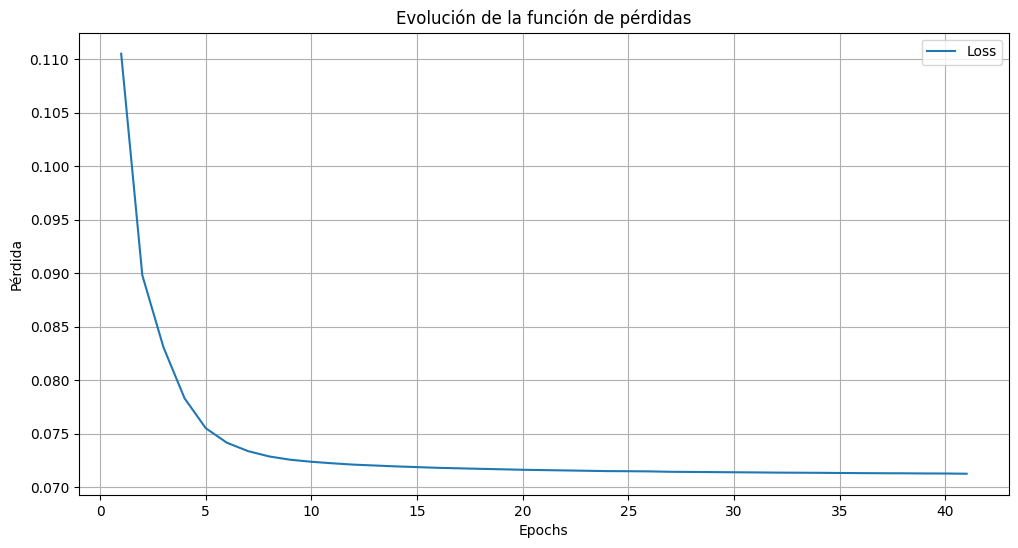

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(mlp_best.loss_curve_) + 1), mlp_best.loss_curve_, label='Loss')
plt.title('Evolución de la función de pérdidas')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

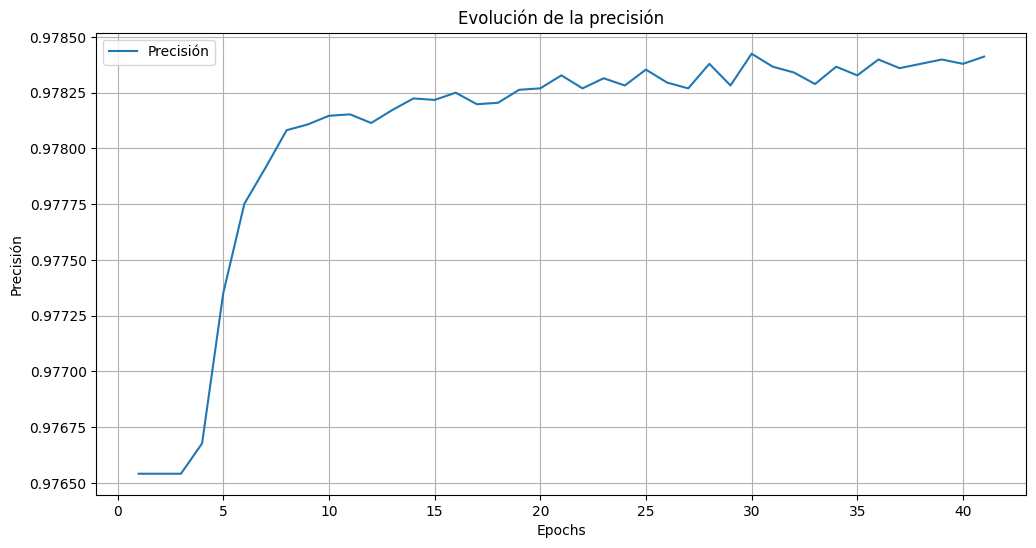

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(mlp_best.validation_scores_) + 1), mlp_best.validation_scores_, label='Precisión')
plt.title('Evolución de la precisión')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

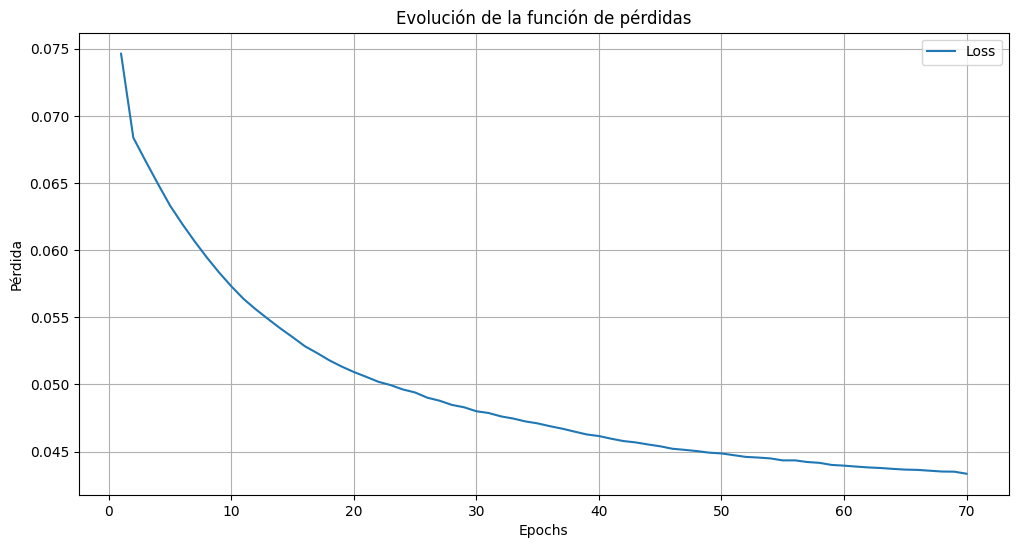

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(mlp_worst.loss_curve_) + 1), mlp_worst.loss_curve_, label='Loss')
plt.title('Evolución de la función de pérdidas')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

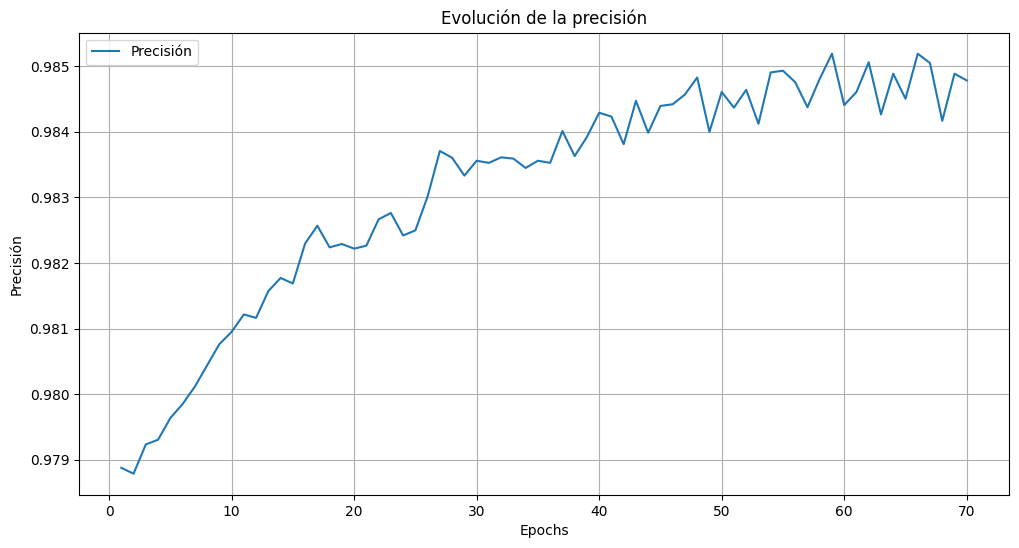

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(mlp_worst.validation_scores_) + 1), mlp_worst.validation_scores_, label='Precisión')
plt.title('Evolución de la precisión')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

## Evaluación

In [8]:
score = mlp_best.score(X_test, y_test)
score

0.9783639903885989

### Matriz de confusión

In [23]:
#y_pred = mlp_best.predict(X_test)
y_pred = mlp_worst.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

#[[376112   1032] [  6687   2377]]  0.9800133606761123
# mlp best [[376535    609] [  7706   1358]] 0.9784701507995691
# mlp worst [[375827   1317] [  4528   4536]] 0.9848656682409479

[[375827   1317]
 [  4528   4536]]


0.9848656682409479

## Grid Search

In [1]:
parameters = {
    'hidden_layer_sizes': [(5,), (8,), (10,), (50,), (100,), (5, 5), (8, 8), (10, 10), (50, 50)],  
    'activation': ['relu', 'tanh'],  # Función de activación
    'solver': ['sgd', 'adam']  # Algoritmo de optimización
}

processors = 32
cv = 5 
combos = 1

for param_name, param_values in parameters.items():
    combos *= len(param_values)

num_models = combos * cv / processors 
seconds = num_models * (fincl-inicl)
minutes = seconds / 60
hours = minutes / 60

print("{:.6f}".format(hours), "| {:.6f}".format(minutes), "| {:.6f}".format(seconds)) 
#2.343750 | 140.625000 | 8437.500000

2.343750 | 140.625000 | 8437.500000


In [ ]:
mlp = MLPClassifier(max_iter=100, verbose=True, early_stopping=True, tol=0.00001)
grid_search = GridSearchCV(mlp, parameters, cv=5)

inigs = time.time()
grid_search.fit(X, y)
fings = time.time()

print("Precisión: %f con parámetros %s" % (grid_search.best_score_, grid_search.best_params_))
print("Tiempo ejecución grid search: " + str(fings-inigs))
print("\n--------------------------\n")
print(grid_search.cv_results_)

for mean, std, param in zip(grid_search.cv_results_['mean_test_score'], 
                            grid_search.cv_results_['std_test_score'], 
                            grid_search.cv_results_['params']):
    print("%f || %f --- %r" % (mean, std, param)) 